# Getting the data

In [1]:
!curl -O 'http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5616k  100 5616k    0     0   371k      0  0:00:15  0:00:15 --:--:--  290k


In [2]:
import zipfile as zp 
import pandas as pd
import geopandas as gpd

# Unzipping the Data and Uploading it as a gpd

In [3]:
zf = zp.ZipFile('nycb2010_16d.zip')
zf.extractall('nycb2010_16d')


In [29]:
df = gpd.read_file('nycb2010_16d/nycb2010_16d/nycb2010.shp')

In [31]:
df.head(n=1)

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,POLYGON ((-74.07920577013245 40.64343078374567...


# Changing the coordinates

In [24]:
coordinates = '+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'

In [30]:
df = df.to_crs(epsg=4326)

# Selecting Brooklyn

In [5]:
df=df[df['BoroName']=='Brooklyn']

# Creating CUSP POINT

In [6]:
import shapely

In [15]:
CUSP = shapely.geometry.Point(-73.9868,40.6934)

# Finding Cusp Polygon

In [36]:
for i in df.index:
    if df.geometry[i].intersects(CUSP):
        print('CUSP is contained in', i)
        index_poligon=i


CUSP is contained in 35383


# Plotting the Polygons and the Point

In [57]:
%matplotlib inline
import matplotlib.pylab as plt

/Users/nicolamacchitella/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:2644: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


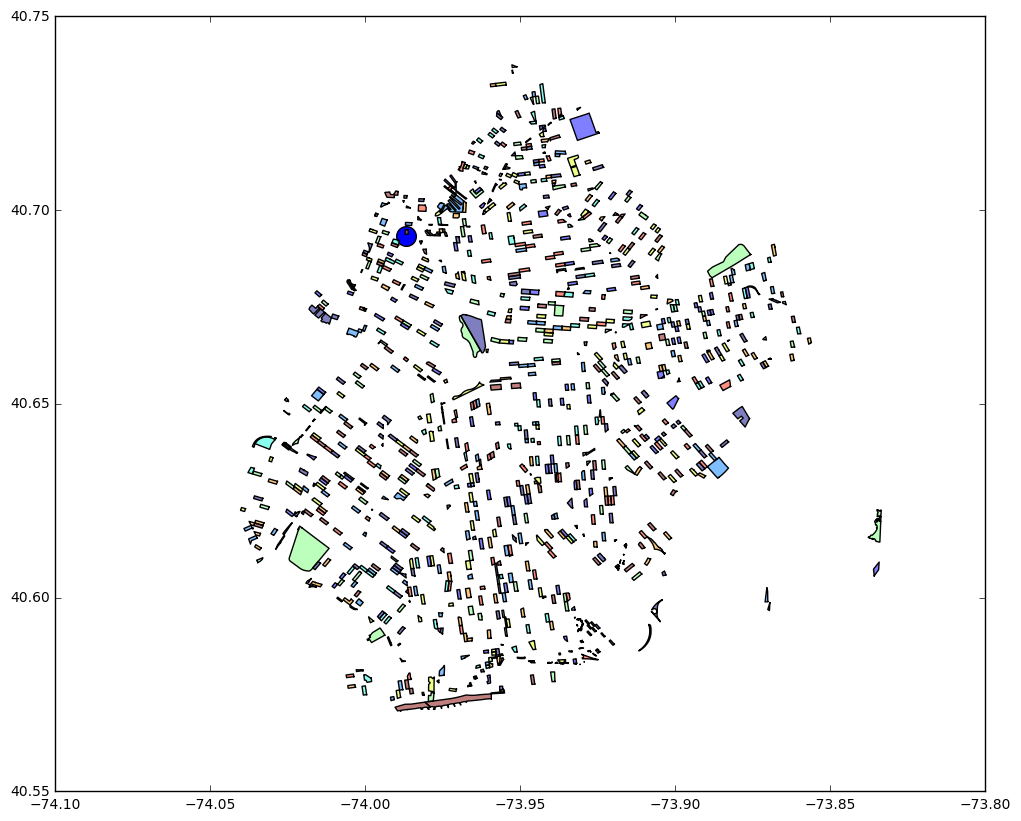

In [70]:
fig, ax = plt.subplots(figsize=(12, 10))

df.iloc[::10, :].plot(ax=ax, c = 'grey')
ax.scatter(-73.9868,40.6934, s = 200)